# **Best Classification Model - PubChem**




In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('acetylcholinesterase_dataset_PubChem.csv')

In [ ]:
import numpy as np
df = df[np.isfinite(df).all(1)]
df = df.reset_index(drop=True)

In [ ]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910


In [ ]:
bioactivity_threshold = []
for i in df.pIC50:
  if float(i) <= 5.0:
    bioactivity_threshold.append("Inactive") #inactive
  elif float(i) >= 6.0:
    bioactivity_threshold.append("Active") #active
  else:
    bioactivity_threshold.append("Intermediate") #intermediate

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='Bio_class')
df = pd.concat([df, bioactivity_class], axis=1)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50,Bio_class
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6.124939,Active
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7.000000,Active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.301030,Inactive
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6.522879,Active
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,6.096910,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,8.590067,Active
5820,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,8.621602,Active
5821,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,9.387216,Active
5822,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,9.200659,Active


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


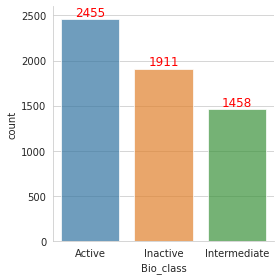

In [ ]:
import math
# Set plotting style
sns.set_style('whitegrid')

# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 
sns.factorplot('Bio_class', data=df, kind='count', alpha=0.7, size=4, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = df['Bio_class'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')


In [ ]:
X = df.drop(['pIC50','Bio_class'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5820,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5821,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5822,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df.Bio_class
Y

0         Active
1         Active
2       Inactive
3         Active
4         Active
          ...   
5819      Active
5820      Active
5821      Active
5822      Active
5823      Active
Name: Bio_class, Length: 5824, dtype: object

In [ ]:
X.shape

(5824, 881)

In [ ]:
Y.shape

(5824,)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1,1,1,1,0,1,1,0,0,1,...,1,0,1,0,1,1,1,0,1,0
5820,1,1,0,1,1,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
5821,1,1,0,1,1,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
5822,1,1,1,1,1,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
Ly = LabelEncoder()
Ly.fit_transform(Y)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
Ly.classes_

array(['Active', 'Inactive', 'Intermediate'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, Y_train.shape

((4659, 221), (4659,))

In [ ]:
X_test.shape, Y_test.shape

((1165, 221), (1165,))

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.1
!pip install PyYAML==5.3.1

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 13.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 269 kB 22.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=cf7d75fc56d7c89ba909aadb4d153148f686012fea0c2ac5c697959bc83d2666
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)

100%|██████████| 29/29 [00:10<00:00,  2.83it/s]


In [ ]:
# Performance table of the training set (80% subset)
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.97,0.97,None,0.97,0.31
DecisionTreeClassifier,0.97,0.96,None,0.97,0.07
ExtraTreeClassifier,0.97,0.96,None,0.97,0.03
ExtraTreesClassifier,0.97,0.96,None,0.97,0.31
LabelPropagation,0.97,0.96,None,0.97,0.13
LabelSpreading,0.97,0.96,None,0.97,0.16
BaggingClassifier,0.95,0.95,None,0.95,0.16
LGBMClassifier,0.95,0.95,None,0.95,0.74
NuSVC,0.88,0.87,None,0.88,0.32


Plot for Train models

[(0.0, 1.0)]

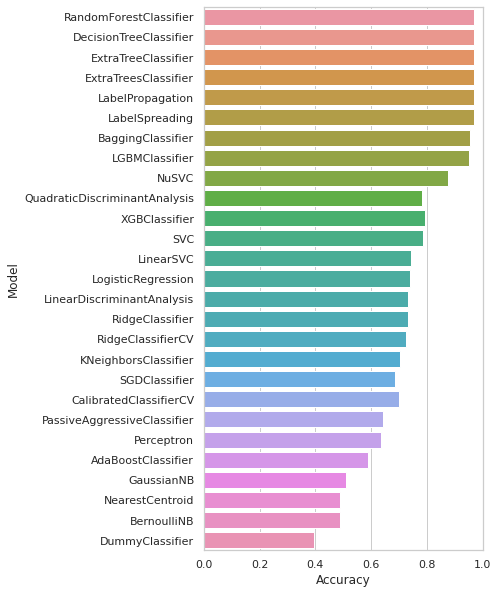

In [ ]:
# Bar plot of Accuracy values
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Accuracy", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

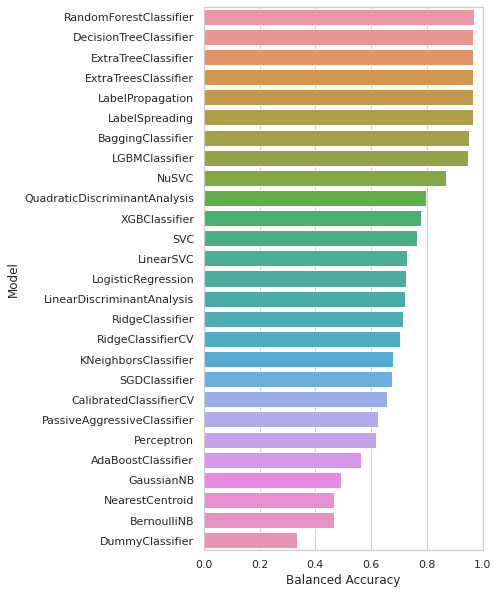

In [ ]:
# Bar plot of Balanced Accuracy values
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Balanced Accuracy", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

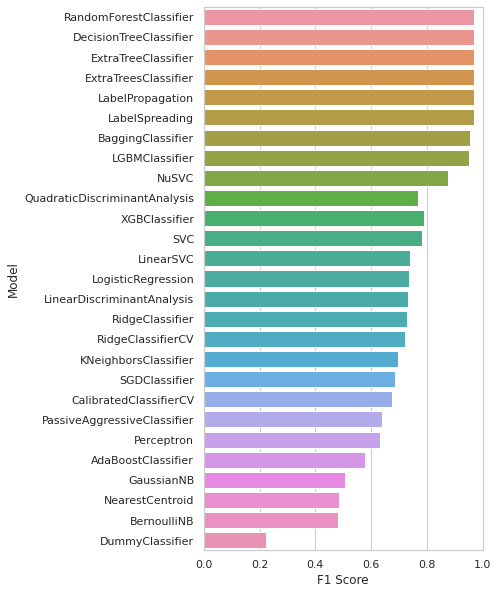

In [ ]:
# Bar plot of F1 Score values
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="F1 Score", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

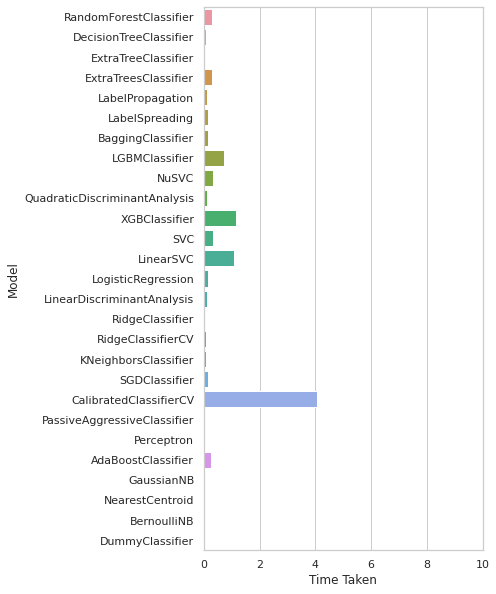

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [00:09<00:00,  2.98it/s]


In [ ]:
# Performance table of the test set (20% subset)
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.73,0.72,None,0.73,0.71
ExtraTreesClassifier,0.73,0.71,None,0.73,0.29
RandomForestClassifier,0.72,0.70,None,0.72,0.30
BaggingClassifier,0.71,0.69,None,0.71,0.16
NuSVC,0.71,0.69,None,0.71,0.27
DecisionTreeClassifier,0.70,0.69,None,0.70,0.06
ExtraTreeClassifier,0.67,0.65,None,0.67,0.03
SVC,0.67,0.64,None,0.66,0.27
LabelPropagation,0.67,0.63,None,0.65,0.10


Plot for Test models

[(0.0, 1.0)]

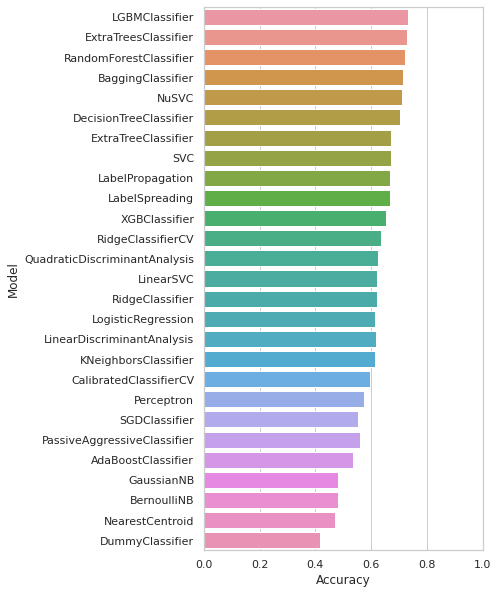

In [ ]:
# Bar plot of Accuracy values
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="Accuracy", data=predictions_test)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

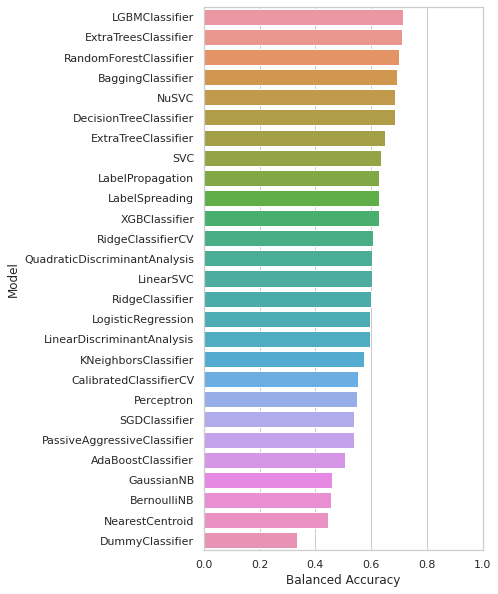

In [ ]:
# Bar plot of Balanced Accuracy values
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="Balanced Accuracy", data=predictions_test)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

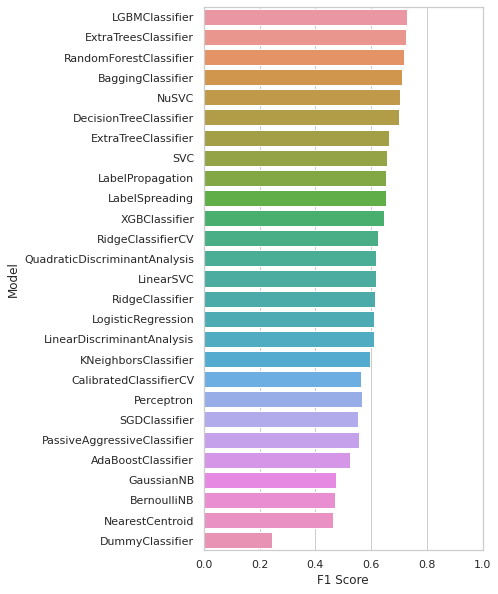

In [ ]:
# Bar plot of F1 Score values
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="F1 Score", data=predictions_test)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

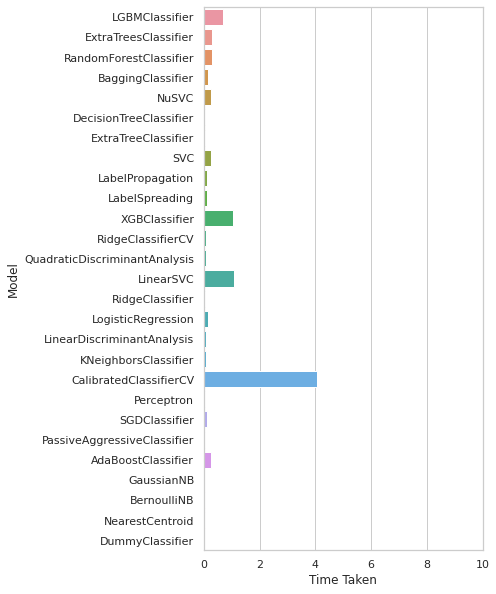

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="Time Taken", data=predictions_test)
ax.set(xlim=(0, 10))

**Class Balancing - SMOTE**

In [ ]:
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [ ]:
X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1,1,1,1,0,1,1,0,0,1,...,1,0,1,0,1,1,1,0,1,0
5820,1,1,0,1,1,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
5821,1,1,0,1,1,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
5822,1,1,1,1,1,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
Y

0         Active
1         Active
2       Inactive
3         Active
4         Active
          ...   
5819      Active
5820      Active
5821      Active
5822      Active
5823      Active
Name: Bio_class, Length: 5824, dtype: object

Class=Active, n=2455 (42.153%)
Class=Inactive, n=1911 (32.812%)
Class=Intermediate, n=1458 (25.034%)


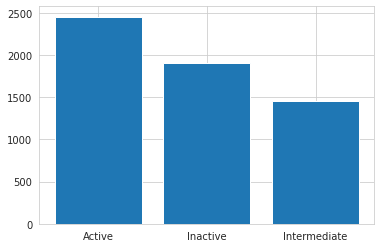

In [ ]:
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# label encode the target variable
#y = LabelEncoder().fit_transform(Y)
LabelEncoder().fit_transform(Y)
# summarize distribution
counter = Counter(Y)
for k,v in counter.items():
	per = v / len(Y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=Active, n=2455 (33.333%)
Class=Inactive, n=2455 (33.333%)
Class=Intermediate, n=2455 (33.333%)


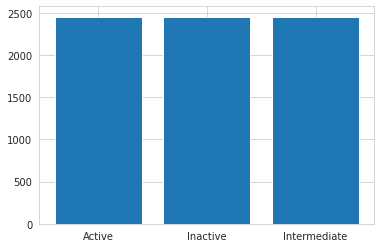

In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, Y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
y

0             Active
1             Active
2           Inactive
3             Active
4             Active
            ...     
7360    Intermediate
7361    Intermediate
7362    Intermediate
7363    Intermediate
7364    Intermediate
Name: Bio_class, Length: 7365, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
Ly = LabelEncoder()
Ly.fit_transform(y)

array([0, 0, 1, ..., 2, 2, 2])

In [ ]:
Ly.classes_

array(['Active', 'Inactive', 'Intermediate'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, y_train.shape

((5892, 221), (5892,))

In [ ]:
X_test.shape, y_test.shape

((1473, 221), (1473,))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from skimage.filters import gabor
from PIL import Image
import glob
import os
import cv2
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, model_selection
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(random_state=42).fit(X_train, y_train)
lgb_pred = model.predict(X_test)
count_misclassified = (y_test != lgb_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
lgbaccuracy = metrics.accuracy_score(y_test, lgb_pred)
print('LGBM Accuracy: {:.2f}'.format(lgbaccuracy))

Misclassified samples: 194
LGBM Accuracy: 0.87


In [ ]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

      Active       0.83      0.93      0.88       475
    Inactive       0.86      0.91      0.88       467
Intermediate       0.92      0.77      0.84       531

    accuracy                           0.87      1473
   macro avg       0.87      0.87      0.87      1473
weighted avg       0.87      0.87      0.87      1473



In [ ]:
from sklearn.metrics import balanced_accuracy_score
Balancedaccuracy = balanced_accuracy_score(y_test, lgb_pred)
print('LGBM Balanced Accuracy: {:.2f}'.format(lgbaccuracy))

LGBM Balanced Accuracy: 0.87


[[444  13  18]
 [ 25 425  17]
 [ 64  57 410]]


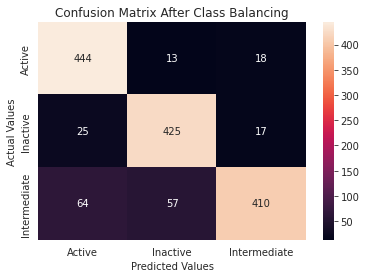

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, lgb_pred)
print(cm)
ax = sns.heatmap(cm, annot=True, fmt='g');
ax.set_title('Confusion Matrix After Class Balancing');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['Active', 'Inactive', 'Intermediate'])
ax.yaxis.set_ticklabels(['Active', 'Inactive', 'Intermediate'])
plt.show()

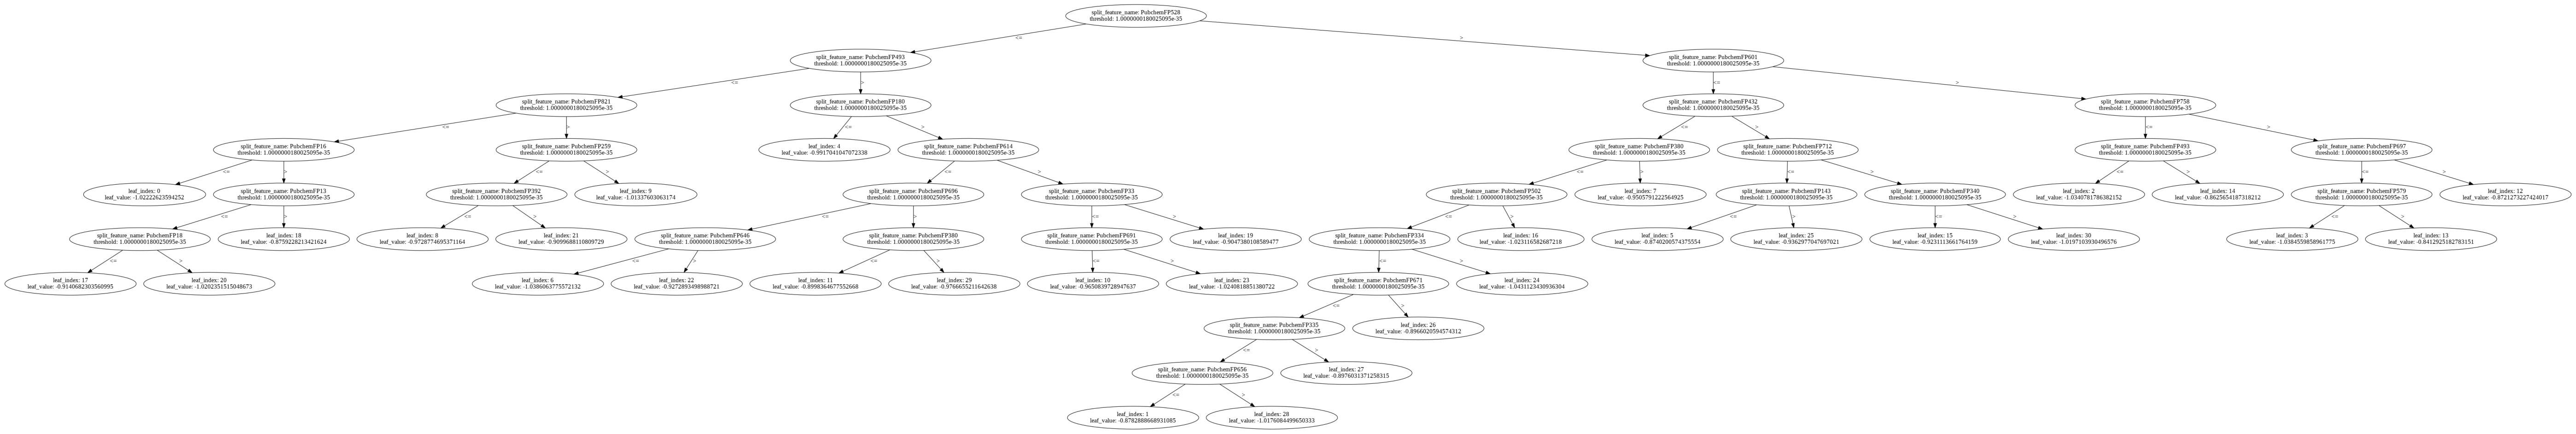

In [ ]:
lgb.plot_tree(model,figsize=(100,100))

In [ ]:
df_resut = pd.DataFrame(lgb_pred,y_test)
df_resut

,0
Bio_class,
Inactive,Inactive
Active,Active
Active,Active
Inactive,Inactive
Intermediate,Inactive
...,...
Inactive,Inactive
Intermediate,Active
Active,Active


**Hyper parameter tuning**

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 26.1 MB/s 
     |████████████████████████████████| 81 kB 6.5 MB/s 
     |████████████████████████████████| 209 kB 94.2 MB/s 
     |████████████████████████████████| 78 kB 8.2 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 147 kB 79.3 MB/s 
     |████████████████████████████████| 112 kB 65.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=f24251972c40709ead3f41d2c78ab63e3e90230f716b0655340ef7d5b8ace12d
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna  # pip install optuna
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from optuna.integration import LightGBMPruningCallback

def objective(trial, X, y):
    param_grid = {
        "n_estimators": trial.suggest_categorical("n_estimators", [5000,10000,50000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1,step=0.05),
        "num_leaves": trial.suggest_int("num_leaves", 20, 40, step=1),
        "max_depth": trial.suggest_int("max_depth", 2, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100, step=10),
        "lambda_l1": trial.suggest_int("lambda_l1", 0.1, 5, step=0.1),
        "lambda_l2": trial.suggest_int("lambda_l2", 0.1, 5, step=0.1),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0.00001, 1),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        ,
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgb.LGBMClassifier(objective="multiclass", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_set=[(X_train, y_train)],
            eval_metric="multi_logloss",
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, "multi_logloss")
            ],  # Add a pruning callback
        )
        preds = model.predict_proba(X_test)
        cv_scores[idx] = log_loss(y_test, preds)

    return np.mean(cv_scores)

[20]	training's multi_logloss: 0.782077	valid_0's multi_logloss: 0.80188
[40]	training's multi_logloss: 0.720026	valid_0's multi_logloss: 0.752427
[60]	training's multi_logloss: 0.684146	valid_0's multi_logloss: 0.71682
[80]	training's multi_logloss: 0.653132	valid_0's multi_logloss: 0.69111
[100]	training's multi_logloss: 0.632615	valid_0's multi_logloss: 0.670863
[120]	training's multi_logloss: 0.614315	valid_0's multi_logloss: 0.656725
[140]	training's multi_logloss: 0.597167	valid_0's multi_logloss: 0.642099
[160]	training's multi_logloss: 0.584429	valid_0's multi_logloss: 0.628653
[180]	training's multi_logloss: 0.571954	valid_0's multi_logloss: 0.617487
[200]	training's multi_logloss: 0.562044	valid_0's multi_logloss: 0.607013
[220]	training's multi_logloss: 0.550957	valid_0's multi_logloss: 0.595605
[240]	training's multi_logloss: 0.542192	valid_0's multi_logloss: 0.587521
[260]	training's multi_logloss: 0.533454	valid_0's multi_logloss: 0.576466
[280]	training's multi_logloss: 

LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, cv=5,
               early_stopping_rounds=5000, lambda_l1=0.1, lambda_l2=0.1,
               learning_rate=0.95, max_depth=2, min_data_in_leaf=1,
               min_gain_to_split=1e-05, n_estimators=50000, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
params = {
      'n_estimators': 5000,
      'learning_rate':0.95,
      'num_leaves': 31,
      'max_depth':2,
      'min_gain_to_split': 0.00001,
      'bagging_fraction': 0.7,
      'min_data_in_leaf': 1,
      'bagging_freq': 1,
      'lambda_l1': 0.1,
      'lambda_l2': 0.1
 }

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(**params,random_state=42).fit(X_train, y_train)
lgb_pred = model.predict(X_test)
count_misclassified = (y_test != lgb_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
lgbaccuracy = metrics.accuracy_score(y_test, lgb_pred)
print('LGBM Accuracy: {:.2f}'.format(lgbaccuracy))

Misclassified samples: 134
LGBM Accuracy: 0.91


In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier(**params,random_state=42).fit(X_train, y_train)
lgb_pred = model.predict(X_test)
count_misclassified = (y_test != lgb_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
lgbaccuracy = metrics.accuracy_score(y_test, lgb_pred)
print('LGBM Accuracy: {:.2f}'.format(lgbaccuracy))

Misclassified samples: 128
LGBM Accuracy: 0.91


In [ ]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

      Active       0.92      0.90      0.91       483
    Inactive       0.93      0.93      0.93       518
Intermediate       0.88      0.90      0.89       472

    accuracy                           0.91      1473
   macro avg       0.91      0.91      0.91      1473
weighted avg       0.91      0.91      0.91      1473



In [ ]:
from sklearn.metrics import balanced_accuracy_score
Balancedaccuracy = balanced_accuracy_score(y_test, lgb_pred)
print('LGBM Balanced Accuracy: {:.2f}'.format(lgbaccuracy))

LGBM Balanced Accuracy: 0.91


[[433  12  38]
 [ 14 482  22]
 [ 26  22 424]]


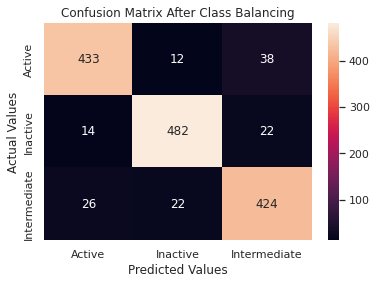

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, lgb_pred)
print(cm)
ax = sns.heatmap(cm, annot=True, fmt='g');
ax.set_title('Confusion Matrix After Class Balancing'); # and Hyperparameter Tuning
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['Active', 'Inactive', 'Intermediate'])
ax.yaxis.set_ticklabels(['Active', 'Inactive', 'Intermediate'])
plt.show()

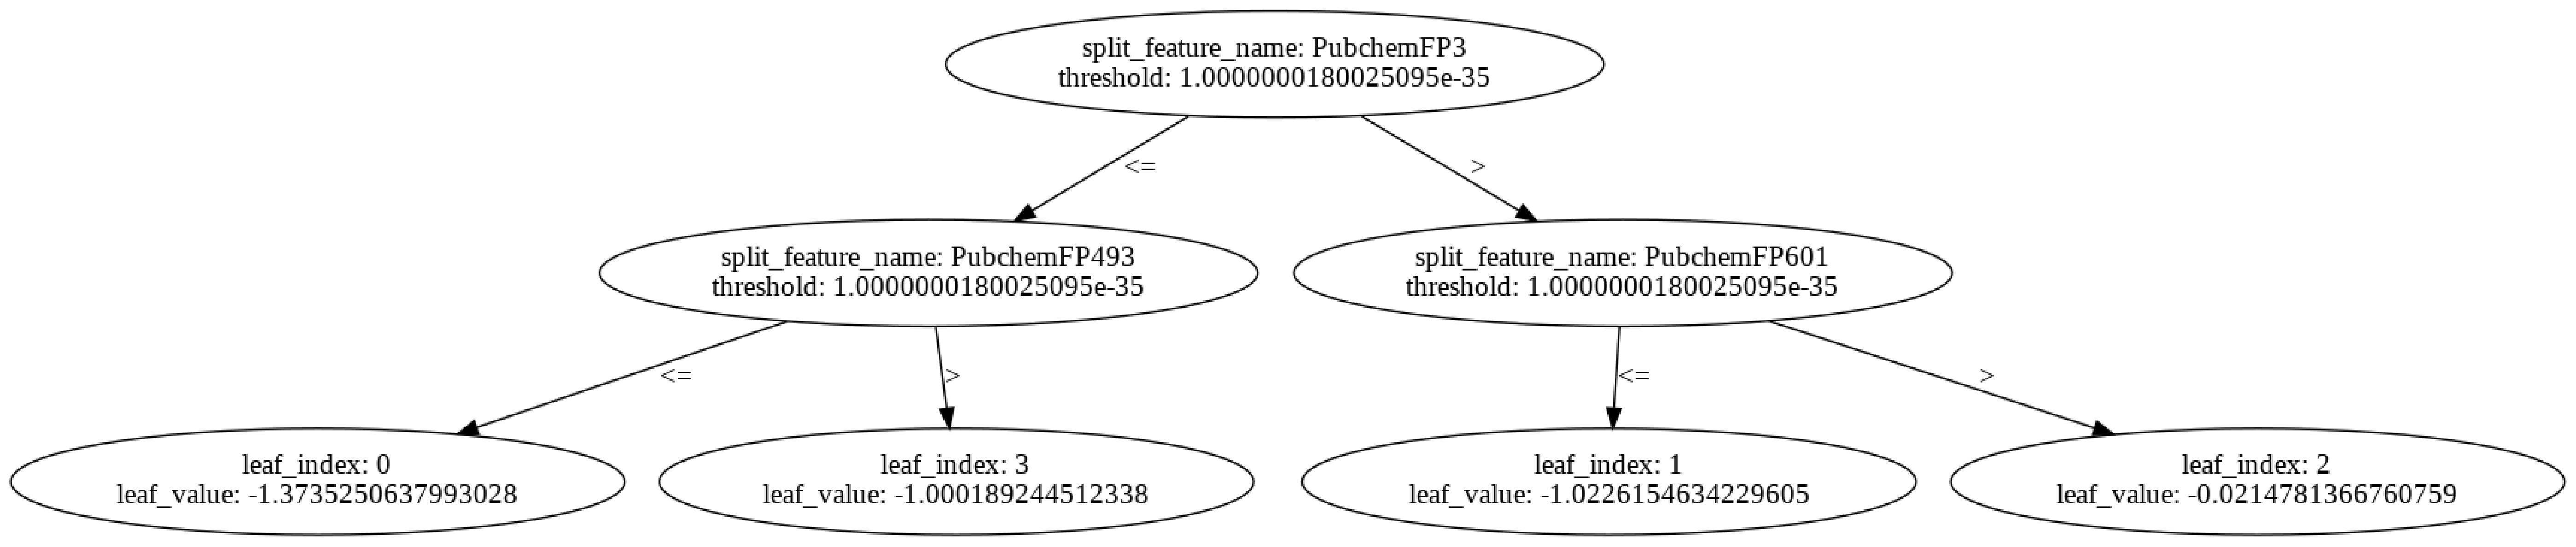

In [ ]:
lgb.plot_tree(model,figsize=(100,100))

In [ ]:
df_resut = pd.DataFrame(lgb_pred,y_test)
df_resut

,0
Bio_class,
Inactive,Inactive
Active,Active
Intermediate,Intermediate
Inactive,Inactive
Inactive,Inactive
...,...
Intermediate,Intermediate
Intermediate,Active
Intermediate,Intermediate


**ROC AUC**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [ ]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [ ]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [ ]:
y_proba = model.predict_proba(X_test)

In [ ]:
classes = model.classes_
classes

array(['Active', 'Inactive', 'Intermediate'], dtype=object)

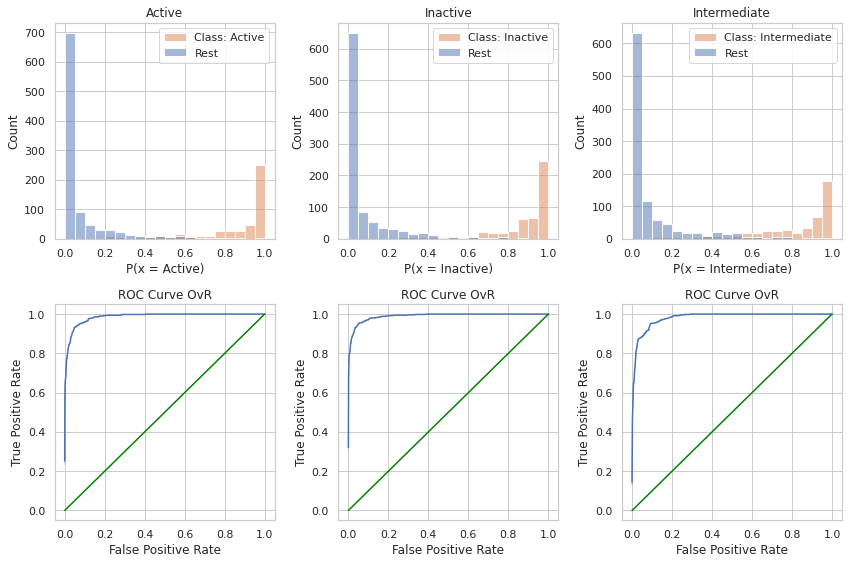

In [ ]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
classes = model.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

In [ ]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

Active ROC AUC OvR: 0.9862
Inactive ROC AUC OvR: 0.9898
Intermediate ROC AUC OvR: 0.9812
average ROC AUC OvR: 0.9857


In [ ]:
# Compares with sklearn (average only)
# "Macro" average = unweighted mean
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovr', average = 'macro')

0.9857244537342145

ROC Curve - One vs One (OvO)
Compares each possible combination of the classes, two at a time

In [ ]:
classes_combinations = []
class_list = list(classes)
for i in range(len(class_list)):
    for j in range(i+1, len(class_list)):
        classes_combinations.append([class_list[i], class_list[j]])
        classes_combinations.append([class_list[j], class_list[i]])
classes_combinations

[['Active', 'Inactive'],
 ['Inactive', 'Active'],
 ['Active', 'Intermediate'],
 ['Intermediate', 'Active'],
 ['Inactive', 'Intermediate'],
 ['Intermediate', 'Inactive']]

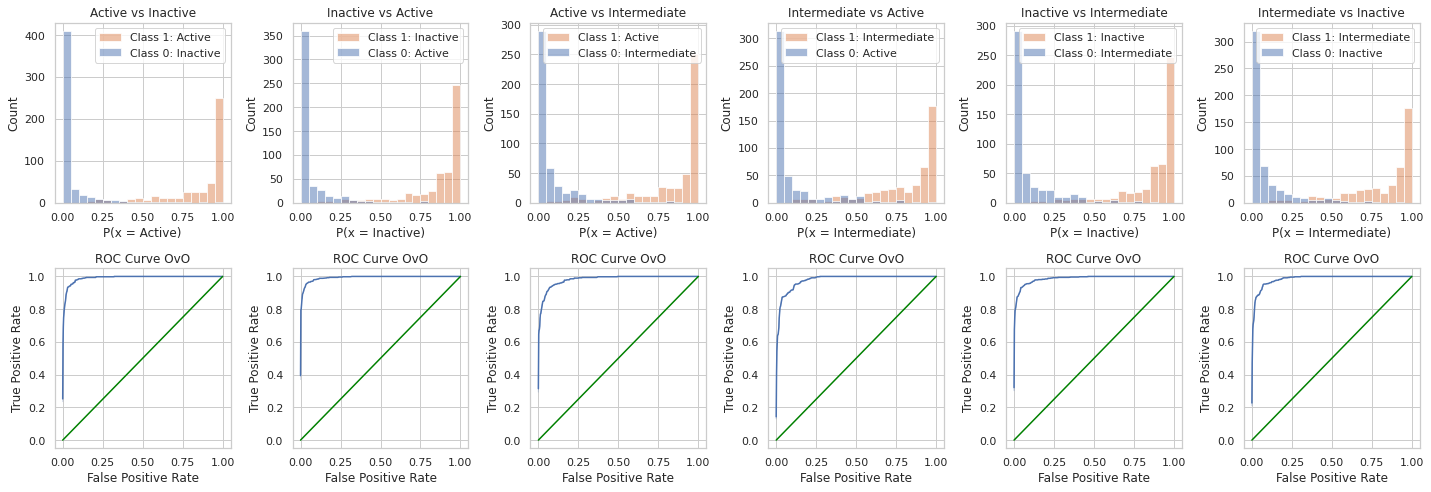

In [ ]:
# Plots the Probability Distributions and the ROC Curves One vs ONe
plt.figure(figsize = (20, 7))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovo = {}

for i in range(len(classes_combinations)):
    # Gets the class
    comb = classes_combinations[i]
    c1 = comb[0]
    c2 = comb[1]
    c1_index = class_list.index(c1)
    title = str(c1) + " vs " + str(c2)
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = y_test
    df_aux['prob'] = y_proba[:, c1_index]
    
    # Slices only the subset with both classes
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(title)
    ax.legend([f"Class 1: {c1}", f"Class 0: {c2}"])
    ax.set_xlabel(f"P(x = {c1})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 6, i+7)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvO")
    
    # Calculates the ROC AUC OvO
    roc_auc_ovo[title] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [ ]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovo:
    avg_roc_auc += roc_auc_ovo[k]
    i += 1
    print(f"{k} ROC AUC OvO: {roc_auc_ovo[k]:.4f}")
print(f"average ROC AUC OvO: {avg_roc_auc/i:.4f}")

Active vs Inactive ROC AUC OvO: 0.9903
Inactive vs Active ROC AUC OvO: 0.9928
Active vs Intermediate ROC AUC OvO: 0.9817
Intermediate vs Active ROC AUC OvO: 0.9779
Inactive vs Intermediate ROC AUC OvO: 0.9867
Intermediate vs Inactive ROC AUC OvO: 0.9842
average ROC AUC OvO: 0.9856


In [ ]:
# Compares with sklearn (average only)
# "Macro" average = unweighted mean
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovo', average = 'macro')

0.9856093620503033

**Feature Importance**

In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(level=0, inplace=True)
feature_importances = feature_importances.rename(columns={'index': 'Features', 'importance': 'Importance'})

In [ ]:
feature_importances['Importance percentage'] = (feature_importances['Importance'] / feature_importances['Importance'].sum()) * 100
feature_importances

,Features,Importance,Importance percentage
0,PubchemFP776,538,1.195556
1,PubchemFP3,510,1.133333
2,PubchemFP144,508,1.128889
3,PubchemFP335,503,1.117778
4,PubchemFP338,502,1.115556
...,...,...,...
216,PubchemFP657,0,0.000000
217,PubchemFP598,0,0.000000
218,PubchemFP666,0,0.000000
219,PubchemFP294,0,0.000000


In [ ]:
feature_importances = feature_importances.head(10)
feature_importances

,Features,Importance,Importance percentage
0,PubchemFP776,538,1.195556
1,PubchemFP3,510,1.133333
2,PubchemFP144,508,1.128889
3,PubchemFP335,503,1.117778
4,PubchemFP338,502,1.115556
5,PubchemFP12,498,1.106667
6,PubchemFP261,480,1.066667
7,PubchemFP206,470,1.044444
8,PubchemFP374,469,1.042222
9,PubchemFP797,467,1.037778


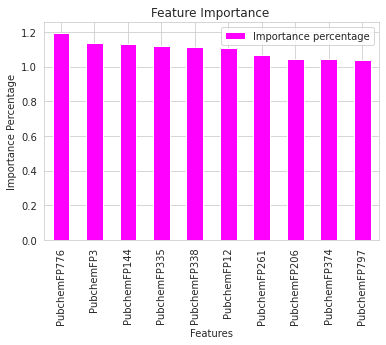

In [ ]:
feature_importances.plot(kind = 'bar',
        x = 'Features',
        y = 'Importance percentage',
        color = 'magenta')
x = feature_importances.Features
# set the title
plt.title('Feature Importance ')
plt.xlabel("Features")
plt.ylabel("Importance Percentage")
# show the plot
plt.show()

Save the model

In [ ]:
import pickle
pickle.dump(model, open('acetylcholinesterase_model_classifier.pkl', 'wb'))